In [0]:
import numpy as np

In [0]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
max_length = 10
results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [0]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 9 unique tokens.


In [0]:
token_index

{'The': 1,
 'ate': 8,
 'cat': 2,
 'dog': 7,
 'homework.': 10,
 'mat.': 6,
 'my': 9,
 'on': 4,
 'sat': 3,
 'the': 5}

In [0]:
word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

In [0]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [0]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [0]:
from keras.datasets import imdb
from keras import preprocessing
max_features = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) 

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
model = Sequential()
model.add(Embedding(10000, 32, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6401      
Total params: 326,401
Trainable params: 326,401
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 167us/step - loss: 0.4905 - acc: 0.7649 - val_loss: 0.3162 - val_acc: 0.8720
Epoch 2/10
20000/20000 [==============================] - 2s 80us/step - loss: 0.2444 - acc: 0.9043 - val_loss: 0.2823 - val_acc: 0.8820
Epoch 3/10
20000/20000 [==============================] - 2s 77us/step - loss: 0.1793 - acc: 0.9303 - val_loss: 0.2804 - val_acc: 0.8858
Epoch 4/10
20000/20000 [==============================] - 2s 79us/step - loss: 0.1308 - acc: 0.9543 - val_loss: 0.2999 - val_acc: 0.8798
Epoch 5/10
20000/20000 [==============================] - 2s 78us/step - loss: 0.0890 - acc: 0.9727 - val_loss: 0.3041 - val_acc: 0.8868
Epoch 6/10
20000/20000 [==============================] - 2s 77us/step - loss: 0.0551 - acc: 0.9851 - val_loss: 0.3293 - val_acc: 0.8818
Epoch 7/10
20000/20000 [==============================] - 2s 78us/step - loss: 0.0308 - acc: 0.9935 - val_loss: 0.3571 - val_acc

In [0]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2020-04-26 09:57:19--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  63.2MB/s    in 1.3s    

2020-04-26 09:57:20 (63.2 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [0]:
!tar --gunzip --extract --verbose --file=aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/44954_0.txt
aclImdb/train/unsup/4

In [0]:
import os
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

nb_validation_samples = int(0.1 * data.shape[0])
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]
#x_train = data[:training_samples]
#y_train = labels[:training_samples]
#x_val = data[training_samples: training_samples + validation_samples]
#y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [0]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-04-26 09:57:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-04-26 09:57:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-04-26 09:57:45--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
glove_dir = '/content'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 2s 80us/step - loss: 0.6374 - acc: 0.6556 - val_loss: 0.5549 - val_acc: 0.7132
Epoch 2/10
22500/22500 [==============================] - 2s 74us/step - loss: 0.5169 - acc: 0.7452 - val_loss: 0.6300 - val_acc: 0.6772
Epoch 3/10
22500/22500 [==============================] - 2s 74us/step - loss: 0.4654 - acc: 0.7815 - val_loss: 0.6596 - val_acc: 0.6584
Epoch 4/10
22500/22500 [==============================] - 2s 73us/step - loss: 0.4242 - acc: 0.8052 - val_loss: 0.6441 - val_acc: 0.6852
Epoch 5/10
22500/22500 [==============================] - 2s 74us/step - loss: 0.3824 - acc: 0.8253 - val_loss: 0.5756 - val_acc: 0.7196
Epoch 6/10
22500/22500 [==============================] - 2s 73us/step - loss: 0.3439 - acc: 0.8419 - val_loss: 0.6383 - val_acc: 0.7156
Epoch 7/10
22500/22500 [==============================] - 2s 73us/step - loss: 0.2985 - acc: 0.8663 - val_loss: 0.8215 - val_acc:

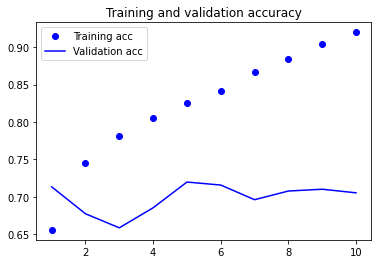

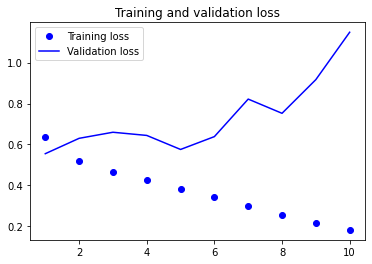

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [0]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 40us/step


[1.1080507637286185, 0.7139999866485596]

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [0]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.6465 - acc: 0.6123 - val_loss: 0.4873 - val_acc: 0.8070
Epoch 2/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.3967 - acc: 0.8363 - val_loss: 0.3705 - val_acc: 0.8512
Epoch 3/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.2807 - acc: 0.8888 - val_loss: 0.3681 - val_acc: 0.8538
Epoch 4/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.2053 - acc: 0.9231 - val_loss: 0.4998 - val_acc: 0.8020
Epoch 5/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.1454 - acc: 0.9480 - val_loss: 0.4870 - val_acc: 0.8002
Epoch 6/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.0946 - acc: 0.9683 - val_loss: 0.4234 - val_acc: 0.8626
Epoch 7/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.0573 - acc: 0.9816 - val_loss: 0.5683 - val_acc:

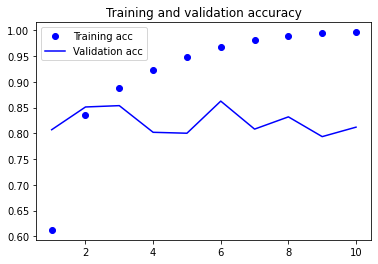

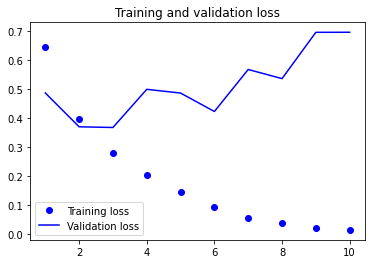

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 119s 6ms/step - loss: 0.5209 - acc: 0.7558 - val_loss: 0.5198 - val_acc: 0.7494
Epoch 2/10
20000/20000 [==============================] - 118s 6ms/step - loss: 0.3057 - acc: 0.8801 - val_loss: 0.3183 - val_acc: 0.8762
Epoch 3/10
20000/20000 [==============================] - 117s 6ms/step - loss: 0.2376 - acc: 0.9103 - val_loss: 0.3173 - val_acc: 0.8786
Epoch 4/10
20000/20000 [==============================] - 118s 6ms/step - loss: 0.2074 - acc: 0.9235 - val_loss: 0.3246 - val_acc: 0.8840
Epoch 5/10
20000/20000 [==============================] - 117s 6ms/step - loss: 0.1787 - acc: 0.9353 - val_loss: 0.2858 - val_acc: 0.8914
Epoch 6/10
20000/20000 [==============================] - 118s 6ms/step - loss: 0.1610 - acc: 0.9427 - val_loss: 0.3187 - val_acc: 0.8918
Epoch 7/10
20000/20000 [==============================] - 118s 6ms/step - loss: 0.1401 - acc: 0.9503 - val_loss: 0.3018 - v

In [0]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb


max_features = 10000
maxlen = 500
batch_size = 32

model = Sequential()
model.add(Embedding(max_features, 32, input_length=maxlen))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile('rmsprop', 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

In [0]:
model = Sequential()
#model.add(Embedding(10000, 100, input_length=500))
model.add(Embedding(input_dim = embedding_matrix.shape[0], output_dim = embedding_matrix.shape[1], input_length = 500, weights = [embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(50)))
#model.add(Dropout(0.25))
#model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#model.layers[0].set_weights([embedding_matrix])
#model.layers[0].trainable = False
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 500, 100)          1000000   
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 100)               60400     
_________________________________________________________________
dropout_17 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 101       
Total params: 1,060,501
Trainable params: 60,501
Non-trainable params: 1,000,000
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
18304/20000 [==========================>...] - ETA: 18s - loss: 0.6896 - acc: 0.5365